In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

img_size = (128, 128)
batch_size = 32

train_dataset = image_dataset_from_directory(
    'test/rps',
    validation_split=0.3,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    'test/rps',
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 394 files belonging to 3 classes.
Using 276 files for training.
Found 394 files belonging to 3 classes.
Using 118 files for validation.


In [2]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  
])

model.summary()

C:\Users\evisp\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',     # what to monitor
    patience=5,             # how many epochs to wait after last improvement
    restore_best_weights=True  # keep the best weights after stopping
)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,             # set a high number of epochs to let EarlyStopping decide when to stop
    callbacks=[early_stop]
)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3303 - loss: 1.8947 - val_accuracy: 0.3983 - val_loss: 1.1223
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4515 - loss: 1.0656 - val_accuracy: 0.3729 - val_loss: 1.0452
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5314 - loss: 0.9886 - val_accuracy: 0.5847 - val_loss: 0.9178
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6779 - loss: 0.7836 - val_accuracy: 0.5678 - val_loss: 0.8299
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7688 - loss: 0.6119 - val_accuracy: 0.6441 - val_loss: 0.6752
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8591 - loss: 0.4000 - val_accuracy: 0.6780 - val_loss: 0.7042
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8464 - loss: 0.4247 - val_accuracy: 0.7797 - val_loss: 0.6190
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9083 - loss: 0.2942 - val_accuracy: 0.8136 - val_loss: 0.6370
Epoch 9/

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.7754 - loss: 0.6200
Validation accuracy: 0.78


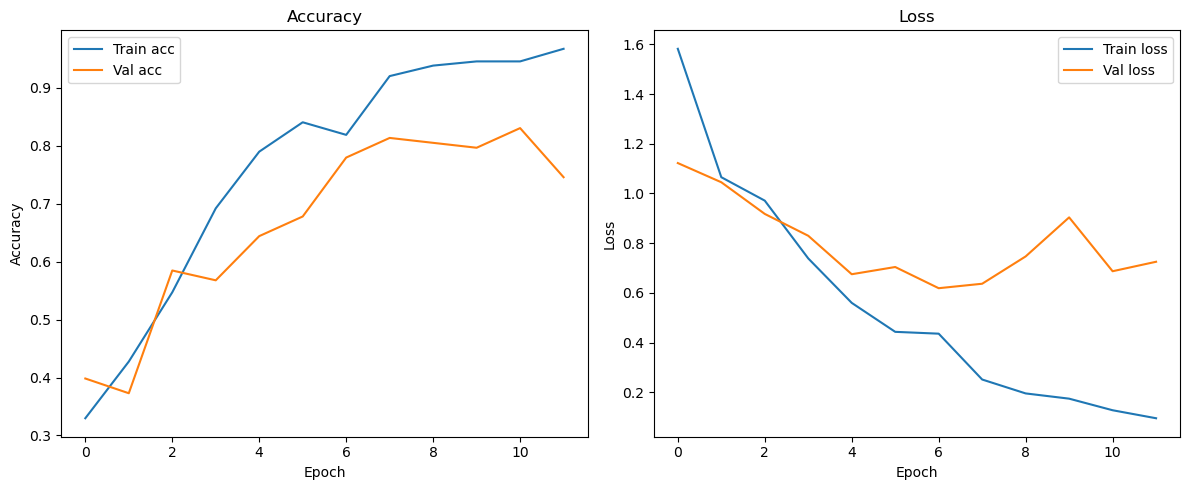

In [5]:
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation accuracy: {val_accuracy:.2f}")

# Step 6: Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Found 60 files belonging to 3 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
✅ Test Accuracy: 70.00%


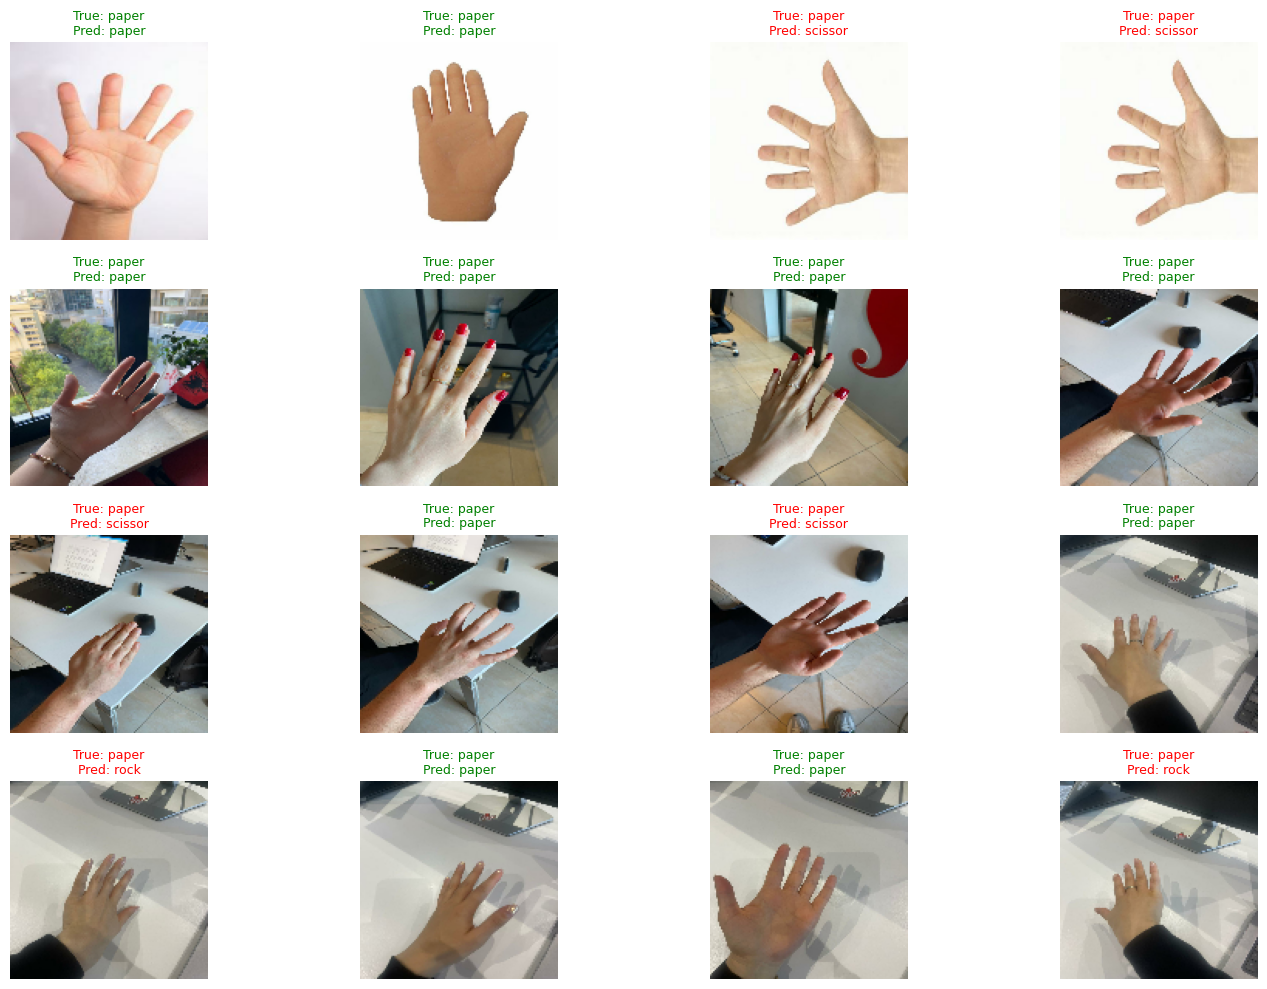

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# 1. Load test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "test/test",
    image_size=(128, 128),  # same size used during training
    batch_size=1,
    shuffle=False
)

class_names = test_dataset.class_names

# 2. Collect all images and labels
y_true = []
images = []

for img_batch, label_batch in test_dataset:
    images.append(img_batch[0].numpy())
    y_true.append(label_batch.numpy()[0])

y_true = np.array(y_true)

# 3. Predict on the test dataset
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)

# 4. Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")

# 5. Plot some sample predictions
plt.figure(figsize=(15, 10))

for i in range(min(16, len(images))):  # plot up to 16 images
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].astype("uint8"))
    true_label = class_names[y_true[i]]
    pred_label = class_names[y_pred[i]]
    color = "green" if true_label == pred_label else "red"
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━

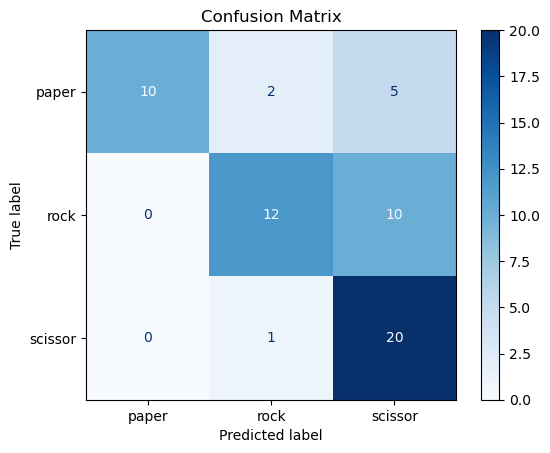

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect all true labels and predictions from the test dataset
true_labels = []
pred_labels = []

for images, labels in test_dataset:
    preds = model.predict(images)
    pred_classes = np.argmax(preds, axis=1)
    true_labels.extend(labels.numpy())
    pred_labels.extend(pred_classes)

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
